In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import*
import seaborn as sns

In [3]:
bid = pd.read_csv("XAGUSD_5 Mins_Ask_2023.01.01_2023.06.30.csv")
ask = pd.read_csv("XAGUSD_5 Mins_Bid_2023.01.01_2023.06.30.csv")  

In [5]:
print(ask.head(3))
print(ask.tail(3))

            Time (UTC)    Open    High     Low   Close  Volume 
0  2023.01.02 23:00:00  24.036  24.059  24.017  24.059   0.3480
1  2023.01.02 23:05:00  24.064  24.130  24.064  24.092   1.8458
2  2023.01.02 23:10:00  24.094  24.098  23.972  23.977   0.9030
                Time (UTC)    Open    High     Low   Close  Volume 
35217  2023.06.30 20:45:00  22.751  22.751  22.746  22.746    0.069
35218  2023.06.30 20:50:00  22.746  22.761  22.736  22.756    0.216
35219  2023.06.30 20:55:00  22.756  22.766  22.701  22.745    0.327


In [7]:
print(bid.head(3))
print(bid.tail(3))

            Time (UTC)    Open    High     Low   Close  Volume 
0  2023.01.02 23:00:00  24.102  24.125  24.083  24.125    0.351
1  2023.01.02 23:05:00  24.094  24.188  24.094  24.141    1.155
2  2023.01.02 23:10:00  24.143  24.148  24.022  24.027    0.882
                Time (UTC)    Open    High     Low   Close  Volume 
35217  2023.06.30 20:45:00  22.781  22.781  22.776  22.776   0.4212
35218  2023.06.30 20:50:00  22.776  22.797  22.774  22.786   0.6836
35219  2023.06.30 20:55:00  22.786  22.811  22.786  22.811   0.3712


In [9]:
merged_data=bid.merge(ask, left_on='Time (UTC)', right_on='Time (UTC)', how='outer')
merged_data

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2023.01.02 23:00:00,24.102,24.125,24.083,24.125,0.3510,24.036,24.059,24.017,24.059,0.3480
1,2023.01.02 23:05:00,24.094,24.188,24.094,24.141,1.1550,24.064,24.130,24.064,24.092,1.8458
2,2023.01.02 23:10:00,24.143,24.148,24.022,24.027,0.8820,24.094,24.098,23.972,23.977,0.9030
3,2023.01.02 23:15:00,24.026,24.028,23.986,24.028,0.8940,23.977,23.980,23.938,23.980,0.8940
4,2023.01.02 23:20:00,24.026,24.073,24.023,24.073,0.9044,23.978,24.024,23.976,24.023,0.8880
...,...,...,...,...,...,...,...,...,...,...,...
35215,2023.06.30 20:35:00,22.782,22.782,22.771,22.776,1.8002,22.752,22.752,22.741,22.746,0.2752
35216,2023.06.30 20:40:00,22.775,22.781,22.775,22.776,0.7568,22.736,22.751,22.736,22.746,0.1410
35217,2023.06.30 20:45:00,22.781,22.781,22.776,22.776,0.4212,22.751,22.751,22.746,22.746,0.0690
35218,2023.06.30 20:50:00,22.776,22.797,22.774,22.786,0.6836,22.746,22.761,22.736,22.756,0.2160


In [11]:
merged_data.columns = ['time', 'open_bid', 'high_bid', 'low_bid', 'close_bid', 'volume_bid', 'open_ask', 'high_ask', 'low_ask', 'close_ask', 'volume_ask']

In [17]:
merged_data.head(3)

,time,open_bid,high_bid,low_bid,close_bid,volume_bid,open_ask,high_ask,low_ask,close_ask,volume_ask
0,2023.01.02 23:00:00,24.102,24.125,24.083,24.125,0.351,24.036,24.059,24.017,24.059,0.3480
1,2023.01.02 23:05:00,24.094,24.188,24.094,24.141,1.155,24.064,24.130,24.064,24.092,1.8458
2,2023.01.02 23:10:00,24.143,24.148,24.022,24.027,0.882,24.094,24.098,23.972,23.977,0.9030


In [21]:
file_obj2 = open('merged_data.csv', 'w')
merged_data.to_csv('merged_data.csv', encoding='utf-8', index=False)
file_obj2.close()

In [25]:
new=pd.read_csv('merged_data.csv', low_memory=False, sep=',')

In [31]:
new.describe()
org=new.drop(['open_ask', 'high_ask', 'low_ask', 'close_ask'],axis=1)
org.shape

(35220, 7)

In [33]:
org['time'] = pd.to_datetime(org['time'])
org.head(3)

,time,open_bid,high_bid,low_bid,close_bid,volume_bid,volume_ask
0,2023-01-02 23:00:00,24.102,24.125,24.083,24.125,0.351,0.3480
1,2023-01-02 23:05:00,24.094,24.188,24.094,24.141,1.155,1.8458
2,2023-01-02 23:10:00,24.143,24.148,24.022,24.027,0.882,0.9030


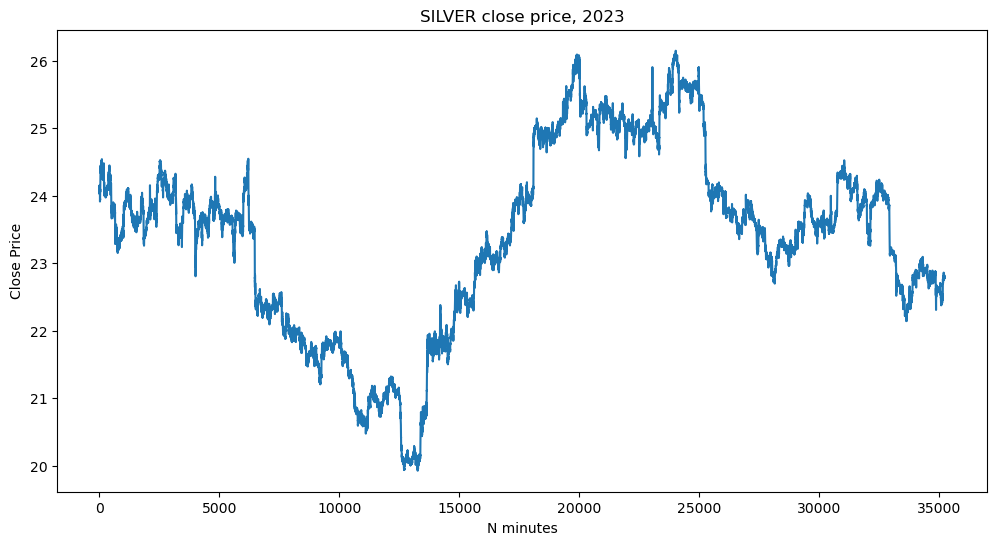

In [35]:
plt.figure(figsize=(12,6))
plt.plot(org['close_bid'])
plt.title('SILVER close price, 2023')
plt.xlabel('N minutes')
plt.ylabel('Close Price')
plt.show()

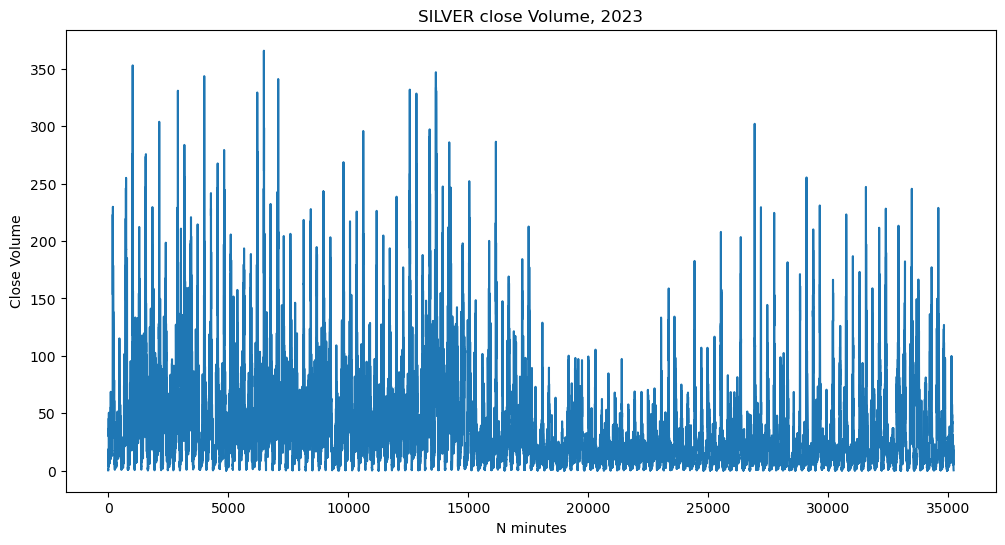

In [37]:
plt.figure(figsize=(12,6))
plt.plot(org['volume_bid'])
plt.title('SILVER close Volume, 2023')
plt.xlabel('N minutes')
plt.ylabel('Close Volume')
plt.show()

In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
columns_float =['open_bid', 'high_bid', 'low_bid', 'close_bid', 'volume_bid','volume_ask']

In [41]:
scaler = MinMaxScaler()
org[columns_float] = scaler.fit_transform(org[columns_float])
print(org.head())

                 time  open_bid  high_bid   low_bid  close_bid  volume_bid  \
0 2023-01-02 23:00:00  0.671325  0.673377  0.670692   0.675020    0.000960   
1 2023-01-02 23:05:00  0.670040  0.683524  0.672464   0.677590    0.003159   
2 2023-01-02 23:10:00  0.677912  0.677082  0.660870   0.659277    0.002412   
3 2023-01-02 23:15:00  0.659116  0.657755  0.655072   0.659438    0.002445   
4 2023-01-02 23:20:00  0.659116  0.665002  0.661031   0.666667    0.002474   

   volume_ask  
0    0.002884  
1    0.015299  
2    0.007484  
3    0.007410  
4    0.007360  


In [43]:
org.describe()

,time,open_bid,high_bid,low_bid,close_bid,volume_bid,volume_ask
count,35220,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000
mean,2023-04-02 13:17:53.202725888,0.556558,0.557388,0.555669,0.556546,0.095985,0.068654
min,2023-01-02 23:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-02-16 00:43:45,0.406265,0.406829,0.404509,0.406104,0.025894,0.021641
50%,2023-03-31 20:27:30,0.589076,0.589950,0.588567,0.589076,0.060819,0.044186
75%,2023-05-17 18:11:15,0.679518,0.681269,0.678744,0.679357,0.127558,0.088571
max,2023-06-30 20:55:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.219884,0.220454,0.220442,0.219897,0.106733,0.074399


In [45]:
org.shape

(35220, 7)

In [47]:
# Shift the 'high_bid' and 'low_bid' columns to next row
org['high_bid_shifted_next'] = org['high_bid'].shift(-1)  # Shift high_bid to next row
org['low_bid_shifted_next'] = org['low_bid'].shift(-1)    # Shift low_bid to next row
org.head(3)


,time,open_bid,high_bid,low_bid,close_bid,volume_bid,volume_ask,high_bid_shifted_next,low_bid_shifted_next
0,2023-01-02 23:00:00,0.671325,0.673377,0.670692,0.675020,0.000960,0.002884,0.683524,0.672464
1,2023-01-02 23:05:00,0.670040,0.683524,0.672464,0.677590,0.003159,0.015299,0.677082,0.660870
2,2023-01-02 23:10:00,0.677912,0.677082,0.660870,0.659277,0.002412,0.007484,0.657755,0.655072


In [49]:
import pandas as pd

# Assuming 'org' is your DataFrame
# Example columns: ['time', 'open_bid', 'high_bid', 'low_bid', 'close_bid', 'volume_bid', 'volume_ask', 'high_bid_shifted_next', 'low_bid_shifted_next']

# Step 1: Define your input features (X) and output labels (y)
X = org[['open_bid', 'high_bid', 'low_bid', 'close_bid', 'volume_bid', 'volume_ask']].values
y = org[['high_bid_shifted_next', 'low_bid_shifted_next']].values

# Now X contains the input features, and y contains the output labels

In [52]:
import numpy as np
import pandas as pd

# Define the look-back window (e.g., 3 previous time steps)
look_back = 3

# Create empty lists to hold the 3D tensor and the corresponding output
X_3d = []
y_3d = []

# Iterate through the dataset and create sequences of look_back time steps
for i in range(len(org) - look_back):
    # Get the sequence of 'look_back' rows for the input features
    X_seq = org[['open_bid', 'high_bid', 'low_bid', 'volume_bid', 'volume_ask', 'high_bid_shifted_next', 'low_bid_shifted_next']].iloc[i:i+look_back].values
    X_3d.append(X_seq)
    
    # The output is the next close_bid value
    y_3d.append(org['close_bid'].iloc[i + look_back])

# Convert the lists to numpy arrays
X_3d = np.array(X_3d)
y_3d = np.array(y_3d)

# Now X_3d is a 3D tensor (samples, time_steps, features)
print(X_3d.shape)  # (number_of_samples, look_back, number_of_features)
print(y_3d.shape)  # (number_of_samples,)

(35217, 3, 7)
(35217,)


C:\Users\ccs\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
881/881 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.0094 - mae: 0.0356 - val_loss: 1.8159e-05 - val_mae: 0.0030
Epoch 2/50
881/881 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 2.7933e-05 - mae: 0.0037 - val_loss: 1.8327e-05 - val_mae: 0.0030
Epoch 3/50
881/881 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 2.7444e-05 - mae: 0.0037 - val_loss: 1.6629e-05 - val_mae: 0.0028
Epoch 4/50
881/881 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 2.7126e-05 - mae: 0.0037 - val_loss: 1.7459e-05 - val_mae: 0.0030
Epoch 5/50
881/881 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 2.7399e-05 - mae: 0.0038 - val_loss: 1.7120e-05 - val_mae: 0.0030
Epoch 6/50
881/881 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 2.7898e-05 - mae: 0.0039 - val_loss: 1.5397e-05 - val_mae: 0.0028
Epoch 7/50
881/881 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 2.4276e-05 - mae: 0.0035 - val_loss: 2.1571e-05 - val_mae: 0.0037
Epoch 8/50
881/881 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 2.3807e-05 - mae: 0.0035 - val_loss: 3.7019e-05 - val_mae: 0.

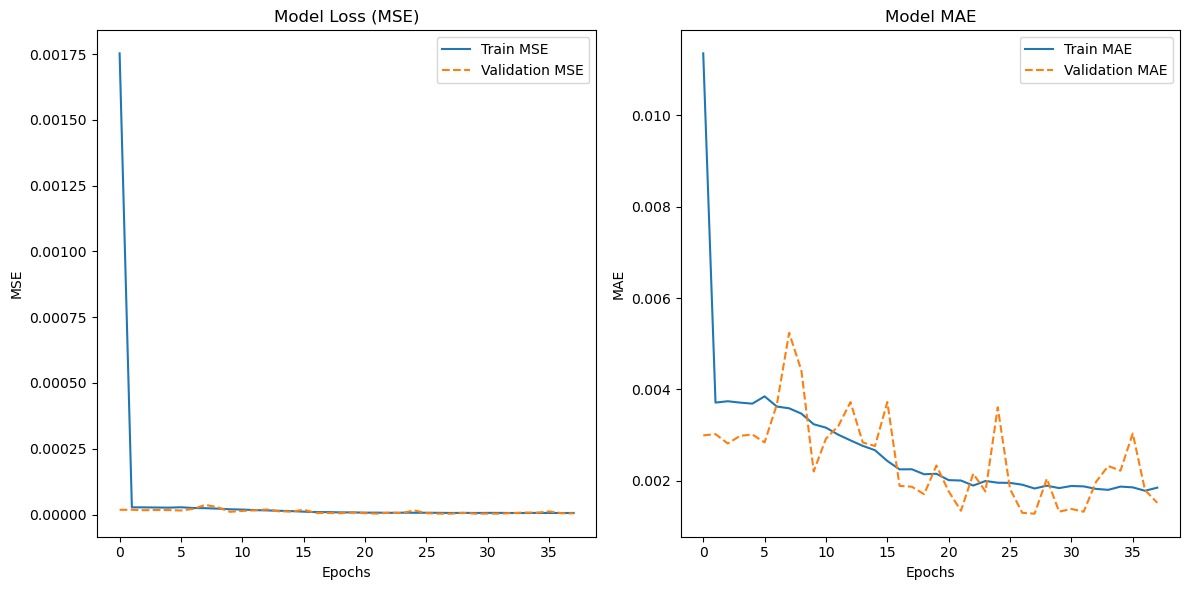

In [54]:
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping  # Make sure to import EarlyStopping

# Define the model (same as before)
model = Sequential()

# Add LSTM layer
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_3d.shape[1], X_3d.shape[2])))

# Add Dense layer for prediction
model.add(Dense(1))  # Predicting 'close_bid' value

# Compile the model with additional metrics for MAE
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                               patience=10,         # Number of epochs with no improvement before stopping
                               restore_best_weights=True)  # Restore the best model weights

# Fit the model with validation data and early stopping
history = model.fit(X_3d, y_3d, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Get the final MSE and MAE values
final_mse = history.history['loss'][-1]  # Last value in the loss history
final_mae = history.history['mae'][-1]  # Last value in the MAE history

print(f"Final MSE: {final_mse}")
print(f"Final MAE: {final_mae}")

# Plotting the loss (MSE) and MAE over epochs
plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Validation MSE', linestyle='--')
plt.title('Model Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE', linestyle='--')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()
